In [80]:
print ("Проверка гипотезы: На выходных (суббота и воскоресенье) обычно падает курс")

Проверка гипотезы: На выходных (суббота и воскоресенье) обычно падает курс


In [53]:
from get_data import get_polo_data
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Беру статистику за 2000 дней 
sd = get_polo_data(pair="USDT_BTC", frame=(2000+1)*60*60*24,zoom='1D')

DEBUG:poloniex:Getting 2019-11-17 22:25:00 - 2019-11-17 22:45:14 USDT_BTC candles from Poloniex...
DEBUG:poloniex:Updating USDT_BTC database with 4 entrys...
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 333.33it/s]
DEBUG:poloniex:Getting USDT_BTC chart data from db


In [57]:
# Скачалось чуть меньше 2000 дней, ну да ладно
print(len(sd))
print(len(sd)-len(sd.dropna()))

1733
0


In [58]:
# Заполняю столбец. Если курс вырос, то 1. Если нет, то '-1' 
sd["delta"]=sd["close"]-sd["open"]
sd["isgrowing"]=sd['delta'].map(lambda delta: math.copysign(1, delta ))

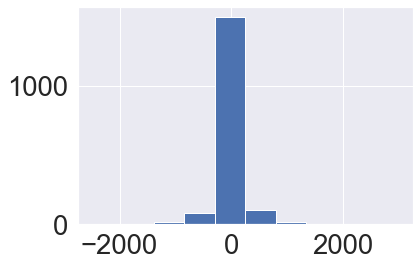

In [59]:
# Это просто построил график. Посмотреть на распределение   
(sd['close']-sd['open']).hist(bins=10)

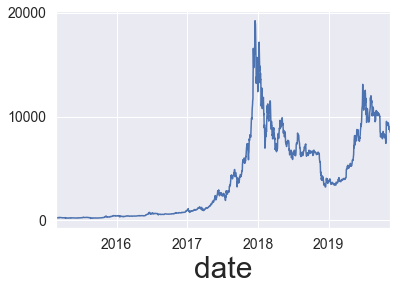

In [60]:
# Это тоже график. Напосмотреть себе
sd['open'].plot(fontsize=14)

In [61]:
# Заполняю столбец День недели 
sd['WeekDay'] = sd.index
sd['WeekDay'] = sd['WeekDay'].dt.weekday_name

In [32]:
# Теперь создаю новый Dataframe. По правилам.А ты как делаешь? 
target_features=['isgrowing']
nominal_features=['WeekDay']

In [33]:
data_nom=sd[nominal_features]
data_nom_dum=pd.get_dummies(data_nom)
data_target=sd[target_features]
data_my=pd.concat([data_nom_dum,data_target],axis=1)

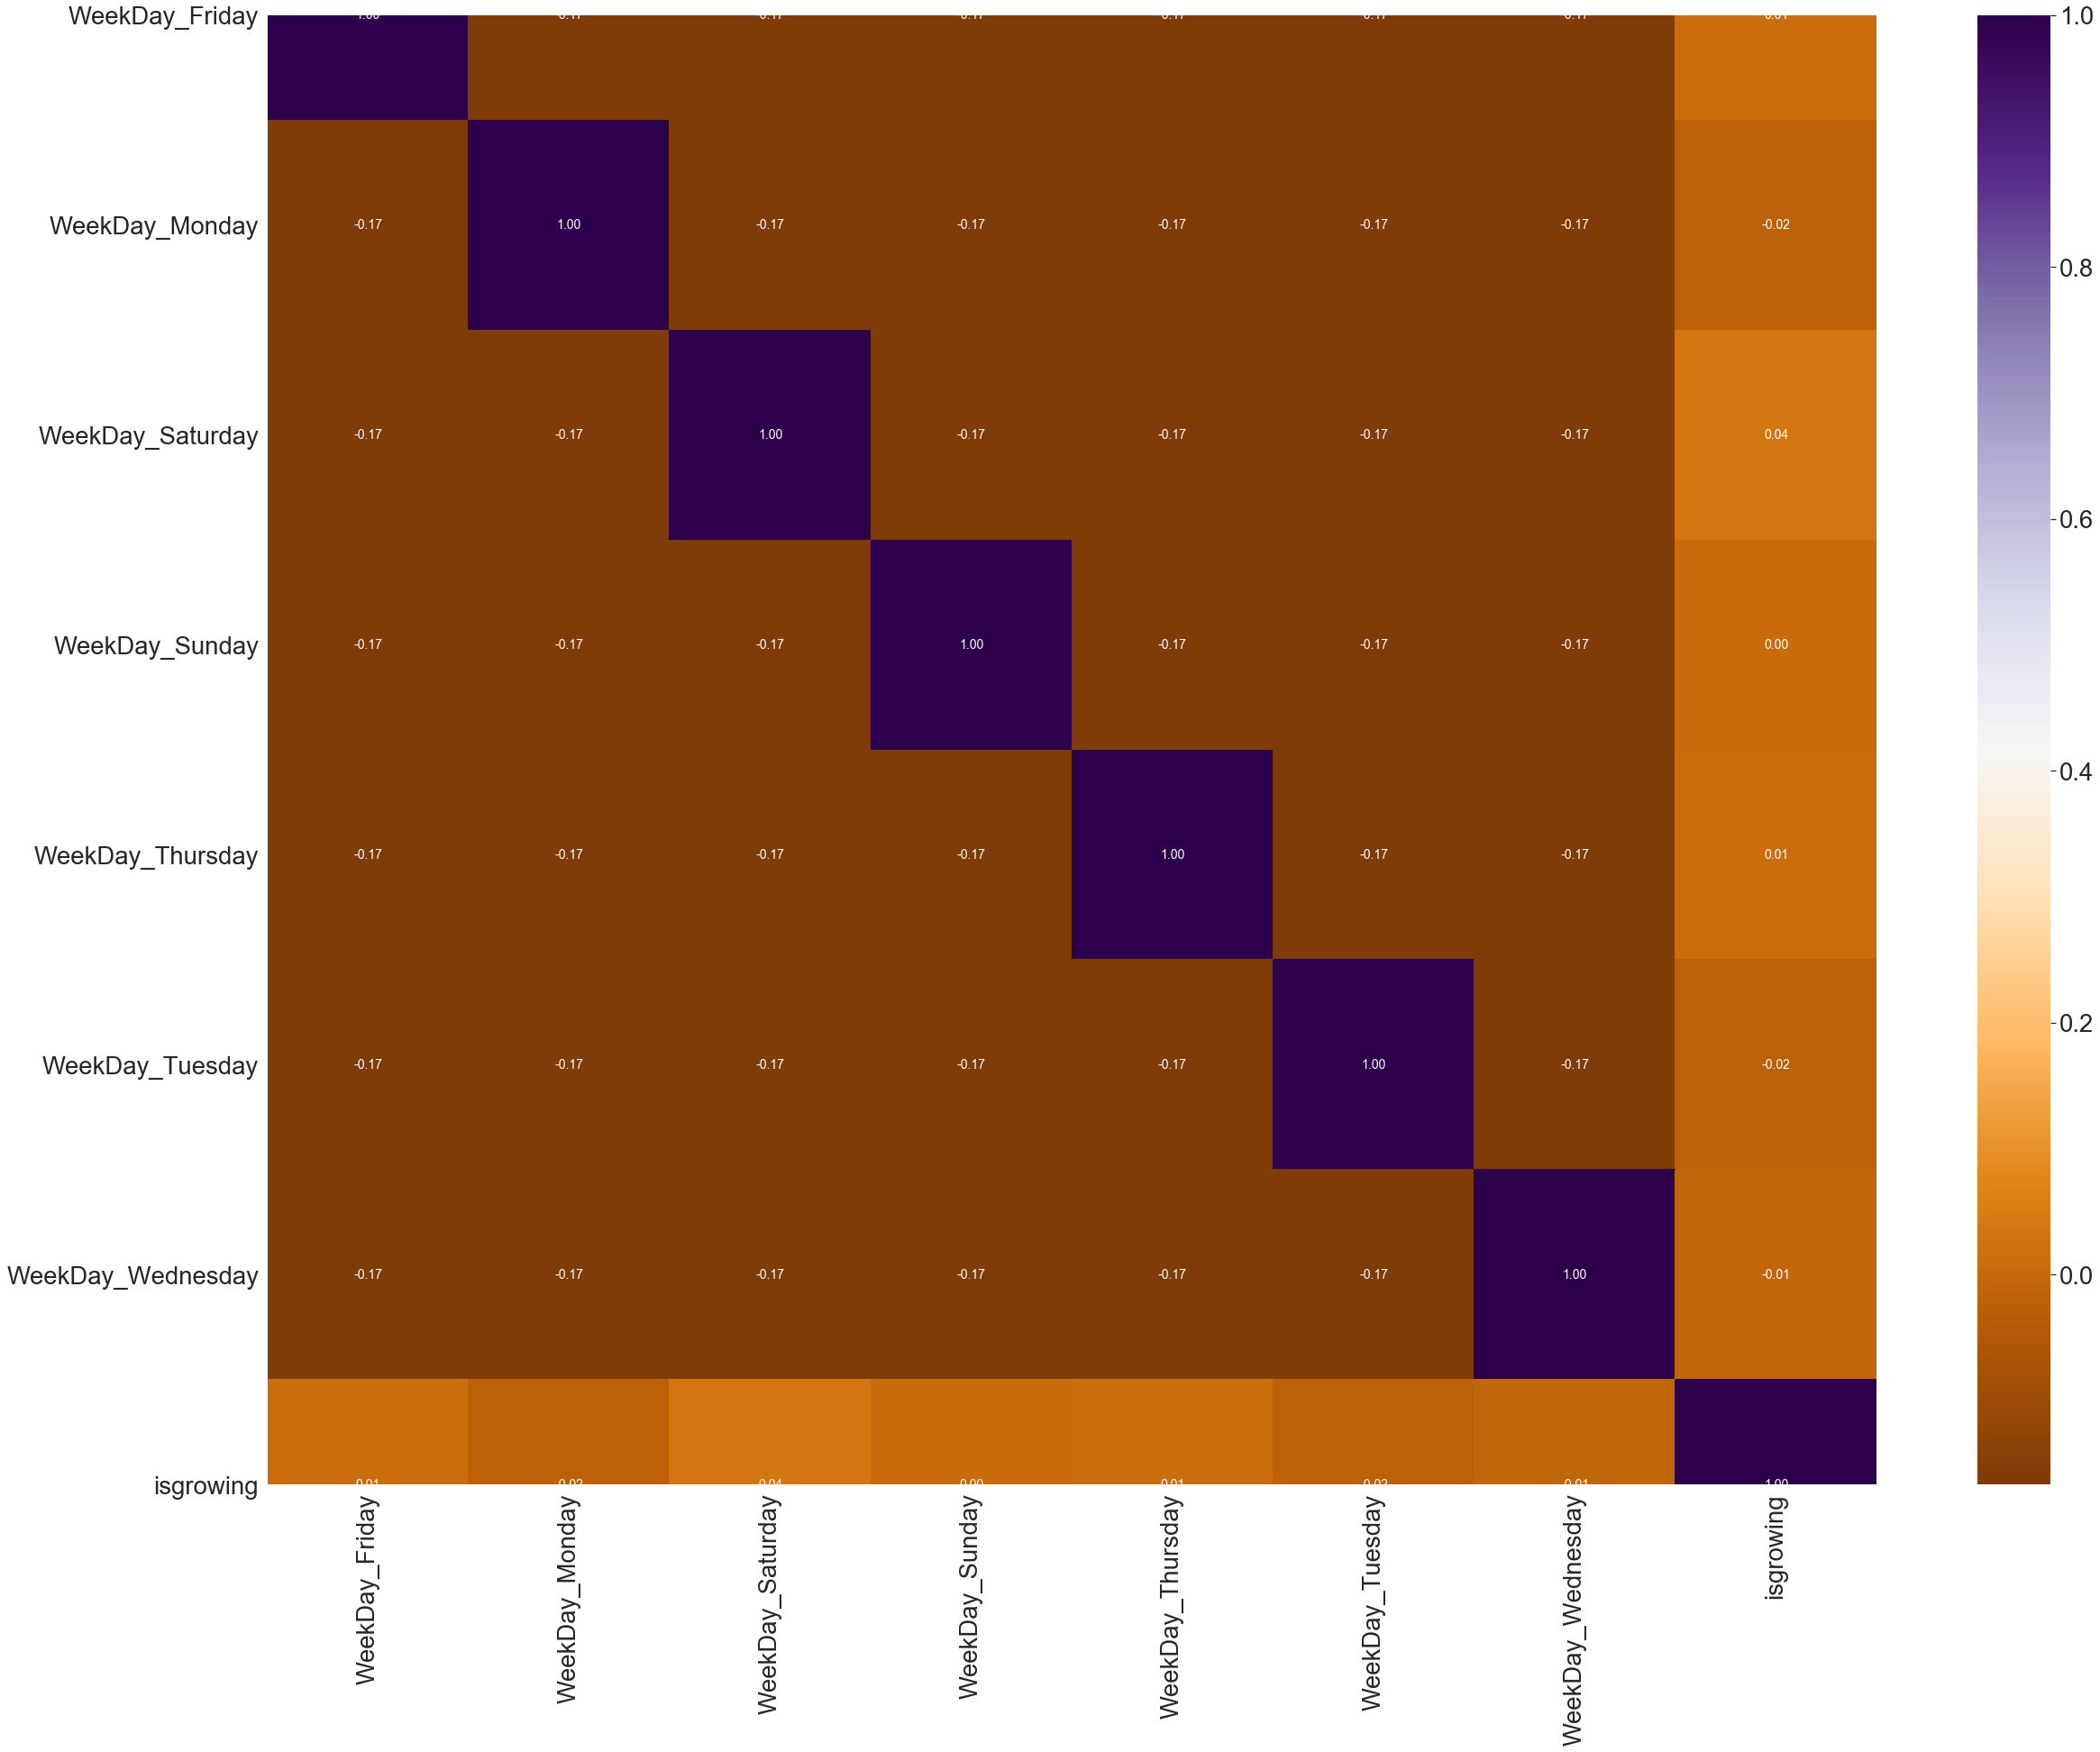

In [37]:
# Строю ковариационную матрицу
sns.set(font_scale=2.5)
plt.figure(figsize=(40,30))
corr_matrix=data_my.corr()
sns.heatmap(corr_matrix,annot=True,fmt = ".2f",cbar = True,cmap='PuOr',annot_kws={"size":14})

In [79]:
# Судя по результатам, никакой связи нет. Везде значения меньше 0.1 
# Но может быть в воскресенье, и то цена не падает, а растет. Вроде так??? 
for i in corr_matrix:
    print(i, corr_matrix[i]['isgrowing'])

0 nan
WeekDay_Friday 0.010107073254160045
WeekDay_Monday -0.024573142495156176
WeekDay_Saturday 0.036640772098256454
WeekDay_Sunday 0.0034736485431359114
WeekDay_Thursday 0.010107073254159356
WeekDay_Tuesday -0.024573142495156432
WeekDay_Wednesday -0.011283937956505504
isgrowing 1.0
delta 0.44694999195659346


In [76]:
# Ок. А может изменить гипотезу. Зависит ли разница между открытием и закрытием от дня недели.
# Добавляем в frame  еще один столбец delta 
data_my['delta']=sd['delta']

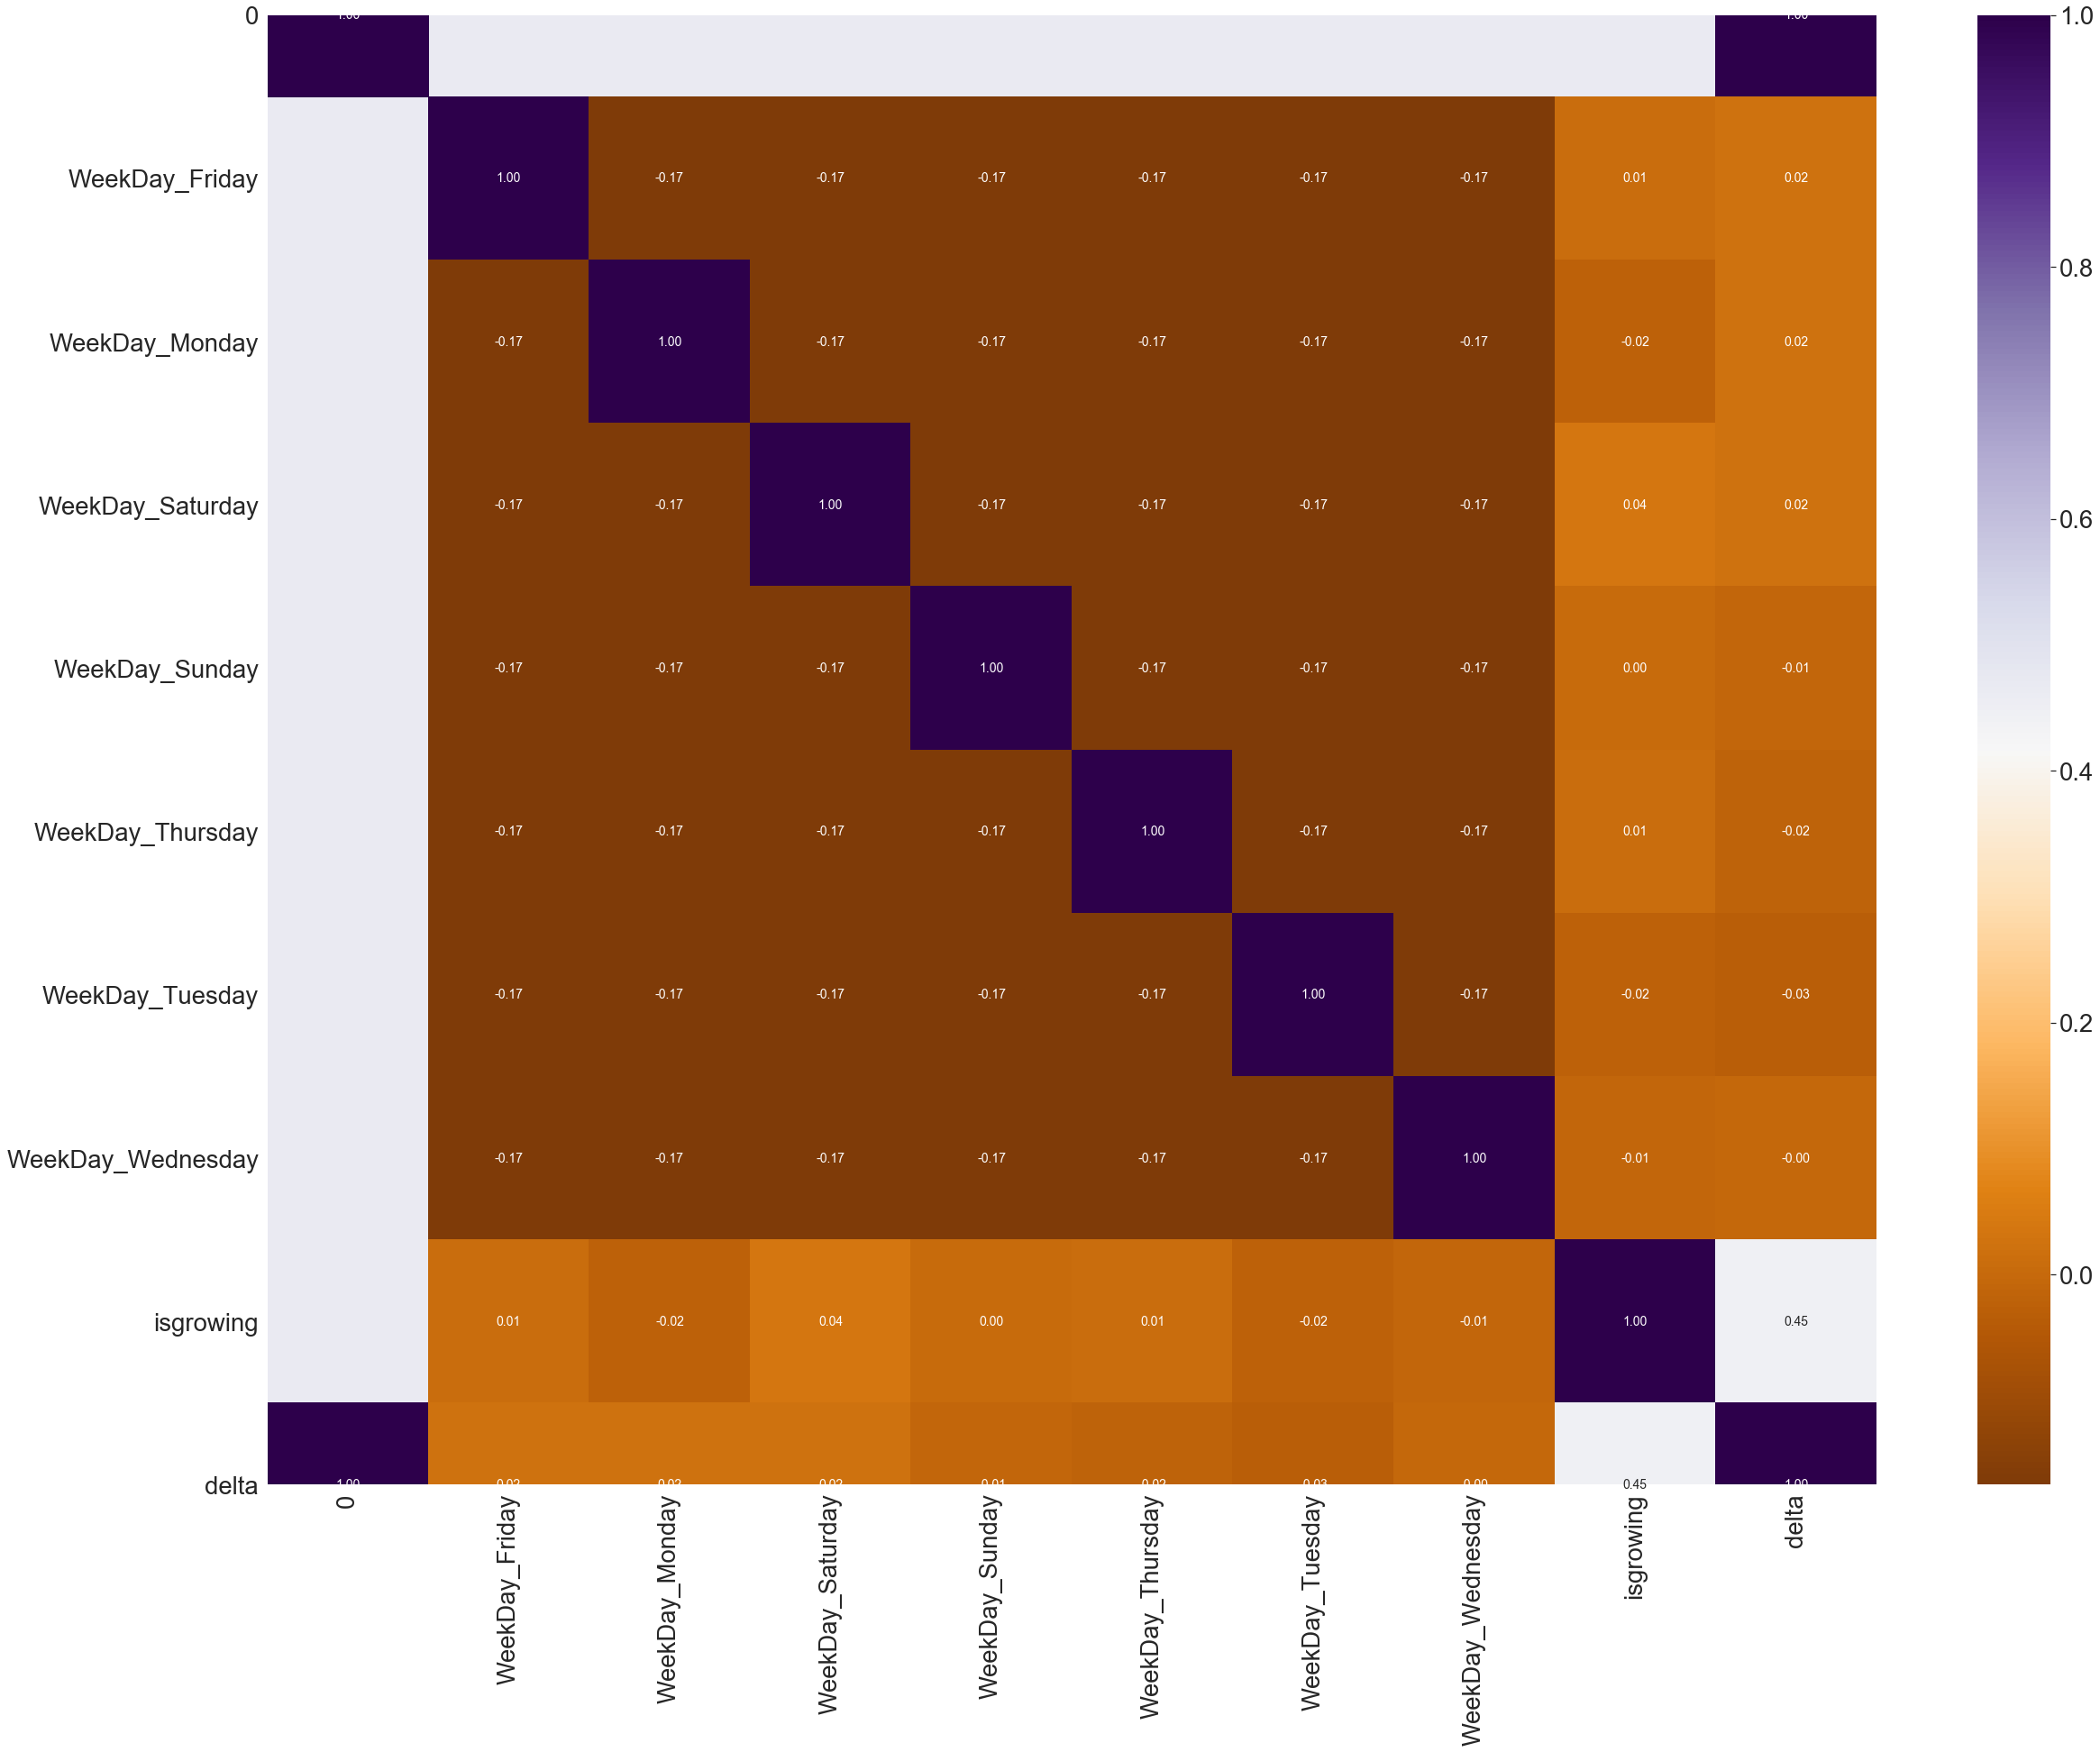

In [73]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,30))
corr_matrix=data_my.corr()
sns.heatmap(corr_matrix,annot=True,fmt = ".2f",cbar = True,cmap='PuOr',annot_kws={"size":14})

In [78]:
# Похоже что не фига не зависит. Как-то так?  
for i in corr_matrix:
    print(i, corr_matrix[i]['delta'])

0 0.9999999360270463
WeekDay_Friday 0.021766127820239567
WeekDay_Monday 0.021319156830551706
WeekDay_Saturday 0.024085329846908744
WeekDay_Sunday -0.010444123084409515
WeekDay_Thursday -0.019936920690367347
WeekDay_Tuesday -0.03218149727358316
WeekDay_Wednesday -0.004634141651024304
isgrowing 0.44694999195659346
delta 1.0
